In [17]:
import pandas as pd
%matplotlib inline

In [18]:
names = ['user_id', 'movie_id', 'rating', 'timestamp', 'gender', 'age', 'occupation', 'zip', 'title', 'genres']
data = pd.read_table('separated data/genre_seperated.dat', sep='\t', header=None, names=names, engine='python')

In [19]:
# An aggregate of the movie ratings for each particular genre

total_ratings_by_genre = data.pivot_table('rating', index='genres', aggfunc=sum)

In [20]:
total_ratings_by_genre.head()

,rating
genres,
Action,898830
Adventure,465789
Animation,159567
Children's,247061
Comedy,1255948


In [21]:
total_ratings_by_gender = data.pivot_table('rating', index='genres', columns='gender', aggfunc=sum)

In [22]:
# The top5 highest ranked genre by women

total_ratings_by_gender.sort_values(('F'), ascending=False)['F'].head()

genres
Drama       369611
Comedy      343890
Romance     184770
Action      159330
Thriller    144035
Name: F, dtype: int64

In [23]:
# The top5 highest ranked genre by men

total_ratings_by_gender.sort_values(('M'), ascending=False)['M'].head()

genres
Drama       965663
Comedy      912058
Action      739500
Thriller    533211
Sci-Fi      450726
Name: M, dtype: int64

In [24]:
# A breakdown of a movie's ratings by age, using movie 'Toy Story (1995)'

labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['age_group'] = pd.cut(data.age, range(0, 81, 10), right=False, labels=labels)
movie = data.loc[data['title'] == 'Toy Story (1995)'][['user_id', 'title', 'rating', 'age', 'age_group']].drop_duplicates()
rating_by_age_group = movie.pivot_table('rating', index='age_group', aggfunc=sum)
rating_by_age_group.sort_values(('age_group'))

,rating
age_group,
0-9,439
10-19,587
20-29,3319
30-39,1820
40-49,648
50-59,1800


In [25]:
# Define a function that given a user_id and movie_id, returns a list of user_ids for other users that rated
# the movie identified by the movie_id with the same score

def function(user_id, movie_id):
    rating = data.loc[(data['user_id'] == user_id) & (data['movie_id'] == movie_id), 'rating'].iloc[0]
    movie = data.loc[(data['movie_id'] == movie_id) & (data['rating'] == rating) & (data['user_id'] != user_id)]
    res = list(set(movie['user_id'].tolist()))
    res.sort()
    return res

users = function(1, 1)
print(users)

[9, 10, 19, 34, 36, 38, 44, 49, 51, 56, 65, 75, 76, 112, 119, 121, 132, 146, 148, 156, 157, 162, 169, 182, 184, 186, 195, 198, 213, 220, 223, 231, 239, 246, 258, 272, 273, 284, 300, 301, 307, 325, 333, 343, 346, 350, 369, 385, 389, 411, 413, 429, 434, 438, 451, 456, 463, 474, 478, 479, 496, 523, 524, 528, 529, 531, 536, 541, 543, 549, 550, 555, 563, 577, 583, 590, 605, 606, 610, 613, 623, 626, 634, 635, 637, 641, 645, 646, 669, 676, 678, 690, 692, 707, 710, 714, 716, 718, 722, 726, 729, 731, 733, 739, 749, 752, 753, 765, 776, 791, 801, 802, 813, 817, 822, 839, 840, 858, 869, 877, 880, 885, 890, 891, 894, 926, 929, 933, 934, 938, 946, 949, 951, 957, 1000, 1004, 1015, 1021, 1032, 1036, 1051, 1054, 1055, 1057, 1059, 1061, 1072, 1076, 1087, 1107, 1112, 1117, 1124, 1125, 1132, 1141, 1145, 1155, 1183, 1202, 1203, 1221, 1223, 1224, 1239, 1266, 1271, 1272, 1274, 1280, 1283, 1285, 1287, 1294, 1298, 1306, 1322, 1325, 1332, 1336, 1340, 1343, 1345, 1350, 1359, 1367, 1389, 1391, 1400, 1407, 1413, 1

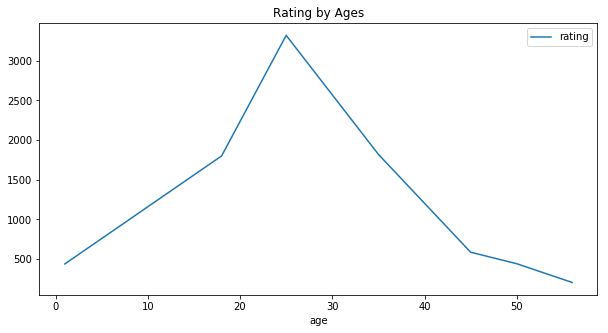

In [26]:
# draw a figure to illustrate the relation between the rating of movie 'Toy Story (1995)' and ages
# the young people are more interested in the Toy Story than the children and the olders

movie.pivot_table('rating', index='age', aggfunc=sum).plot(figsize=(10,5), title='Rating by Ages')

In [27]:
# analyze how the first letter of movies relates to rating

get_first_letter = lambda x: x[:1]
first_letters = data['title'].map(get_first_letter)
first_letters.title = 'first_letter'
rating_by_first_letter = data.pivot_table('rating', index=first_letters, aggfunc='mean')

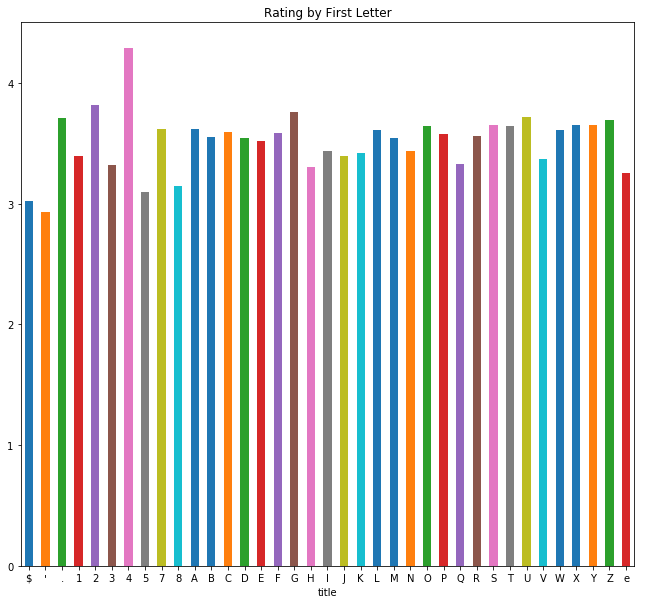

In [28]:
import matplotlib.pyplot as plt

# make bar plots for relations between rating and first letter of movies
# the first letter of a movie does not have a big effect on how they attract people
# since their ratings are almost at the same level

fig, axes = plt.subplots(figsize=(11, 10))
rating_by_first_letter['rating'].plot(kind='bar', rot=0, ax=axes, title='Rating by First Letter')